Investors wish to know which assets have moved similarly in the past. The may help investors, predict the future returns of those assets. Correlation technique can be used to find out assets that move in the same direction. However there are many cases when correlation can fail. In this notebook we will learn how we can use this technique in Finance and the potential pitfalls we should be aware of.

Correlation values is between -1 & 1. A positive correlation, indicates that assets move in the same direction. A negative correlation indicates that the assets move inverse to each other. Correlation near 0 indicates weak relationship between the assets.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
# generate positive random numbers
X = np.random.rand(50)

Y = 2 * X + np.random.normal(0,0.1,50)

In [37]:
print(f"The covariance of X and Y is :{np.cov(X,Y)[0,1]}")

The covariance of X and Y is :0.17105693232883343


The covariance does not tell us much about the scale. So we will use it to get the correlation of X and Y

In [42]:
print(f"The correlation of X and Y is :{np.corrcoef(X,Y)[0,1]}")

The correlation of X and Y is :0.9855050642173622


We can confirm that by plotting a scatter plot.

Text(0, 0.5, 'Y')

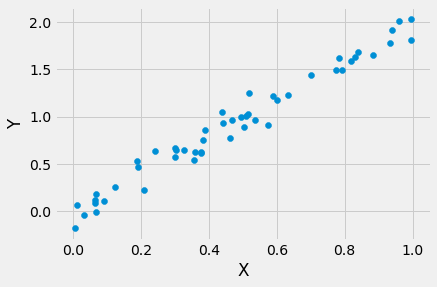

In [45]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

Lets plot some numbers with no relationship.

The correlation of X and Y is :-0.025338274549108798


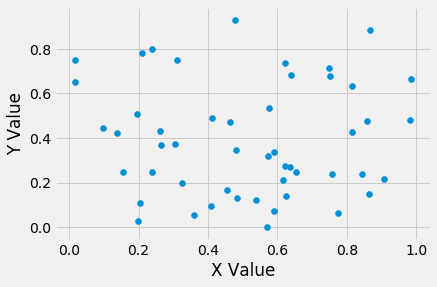

In [47]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print(f"The correlation of X and Y is :{np.corrcoef(X,Y)[0,1]}")

We can see the correlation is close to 0, indicating there is no relationship between the two variables.

Next lets look at an inverse correlation data.

The correlation of X and Y is :-0.9512911420579049


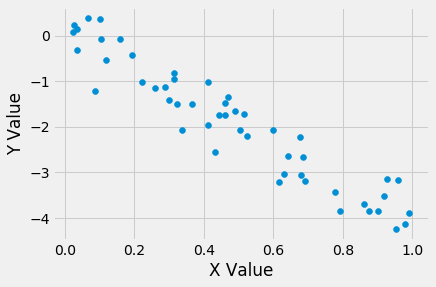

In [52]:
X = np.random.rand(50)
Y = -4 * X + np.random.normal(0,0.35,50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print(f"The correlation of X and Y is :{np.corrcoef(X,Y)[0,1]}")

How can we use this in Investing?

We can look at two assets belonging to the same industry or sector and observe their relationship. We could use this relationship to predict the future values of these assets. <br>
We can also use it to combine uncorrelated assets together and form a portfolio. Such portfolios have great diversification benefits.<br>
Let us use real data to demonstrate. We will consider software companies Adobe and Microsoft returns along with the XLK sector etf.

In [55]:
import pandas_datareader as web

msft = web.get_data_yahoo('MSFT',
                         '2015-1-1')['Adj Close'].pct_change()[1:]

adbe = web.get_data_yahoo('ADBE',
                         '2015-1-1')['Adj Close'].pct_change()[1:]

xlk = web.get_data_yahoo('XLK',
                         '2015-1-1')['Adj Close'].pct_change()[1:]


Text(0.5, 1.0, 'Stock returns from 2015 to 2020')

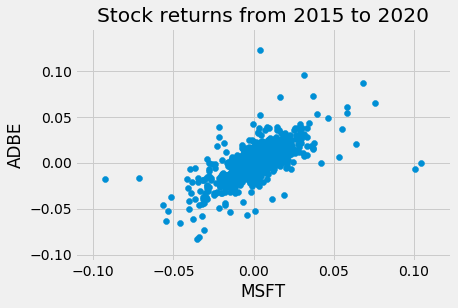

In [59]:
plt.scatter(msft,adbe)
plt.xlabel('MSFT')
plt.ylabel('ADBE')
plt.title('Stock returns from 2015 to 2020')

Text(0.5, 1.0, 'Stock returns from 2015 to 2020')

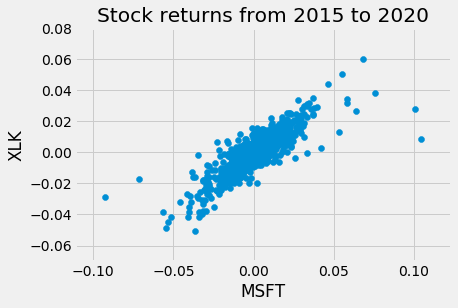

In [60]:
plt.scatter(msft,xlk)
plt.xlabel('MSFT')
plt.ylabel('XLK')
plt.title('Stock returns from 2015 to 2020')

Text(0.5, 1.0, 'Stock returns from 2015 to 2020')

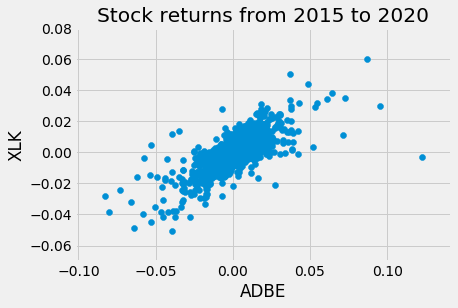

In [61]:
plt.scatter(adbe, xlk)
plt.xlabel('ADBE')
plt.ylabel('XLK')
plt.title('Stock returns from 2015 to 2020')

We can observe that all three are highly correlated. We can calculate their correlation coefficient values.

In [63]:
print("Correlation coefficients")
print("MSFT and ADBE: ", np.corrcoef(msft,adbe)[0,1])
print("MSFT and XLK: ", np.corrcoef(msft,xlk)[0,1])
print("ADBE and XLK: ", np.corrcoef(adbe,xlk)[0,1])

Correlation coefficients
MSFT and ADBE:  0.674967558202205
MSFT and XLK:  0.8402729433881284
ADBE and XLK:  0.7464656997582017


### Limitations

There are however some limitations to use correlations. 

- We cannot determine if the correlation is rigorous, especially when data is not normally distributed.
- Correlation gives us a singal point estimate for the time period that we choose. This relationship may or maynot hold in the future.

We will look at the rolling correlation to examine the correlation over rolling 60 day period.

In [66]:
msft_adbe_60_cor = msft.rolling(window=60).corr(adbe)

Text(0.5, 1.0, '60Day Rolling Correlation\nfor MSFT and ADBE')

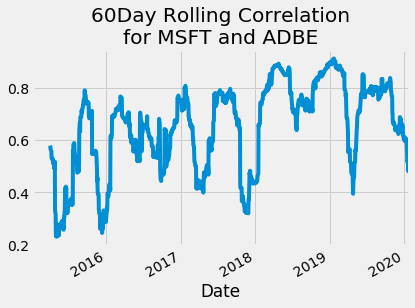

In [68]:
msft_adbe_60_cor.plot()
plt.title("60Day Rolling Correlation\nfor MSFT and ADBE")

The 60 day rolling correlation can oscillate widely between 0.2 and 0.8. This suggests that the correlation is not stable.

- Correlations are not useful to capture, relationships that are delayed.
- Correlation can sometimes be sensitive to outliers. This means that a few outlier data points can have a huge effect on the correlations.